# 1. Using the DecisionTreeClassifier from sklearn

Accuracy (Gini Index): 0.92


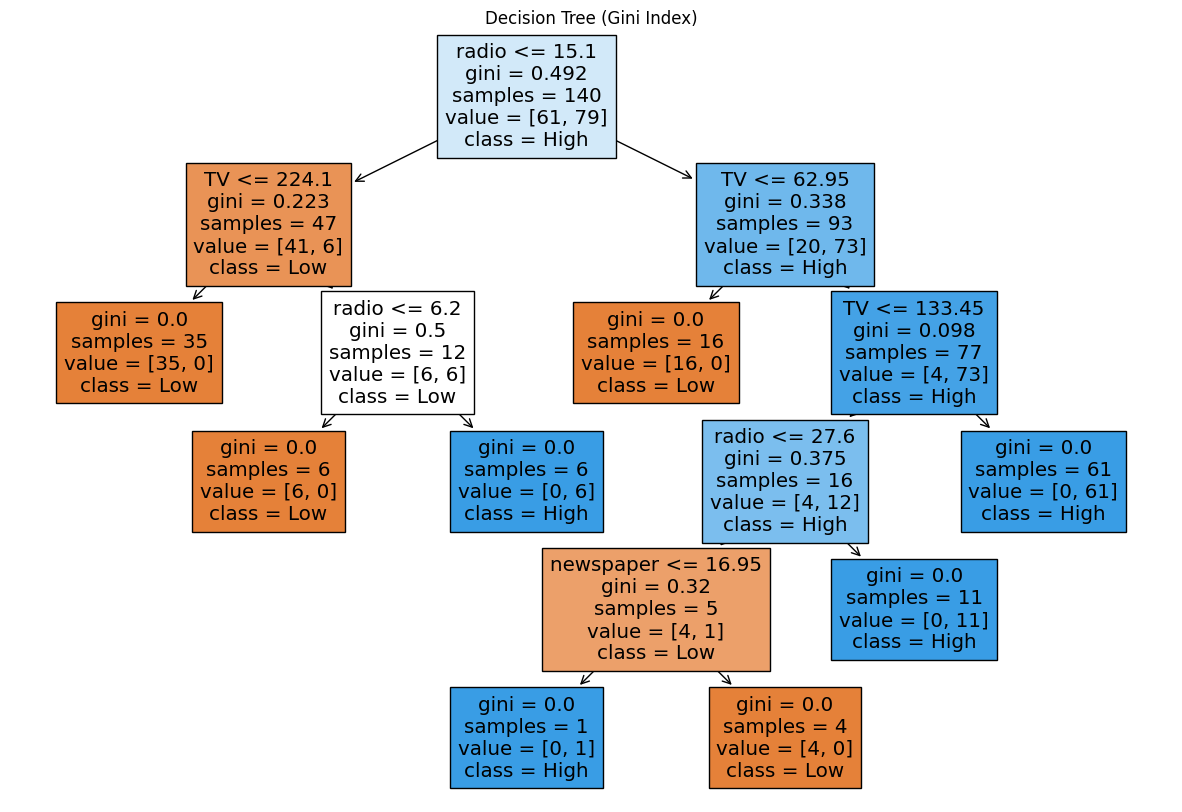

Accuracy (Entropy): 0.92


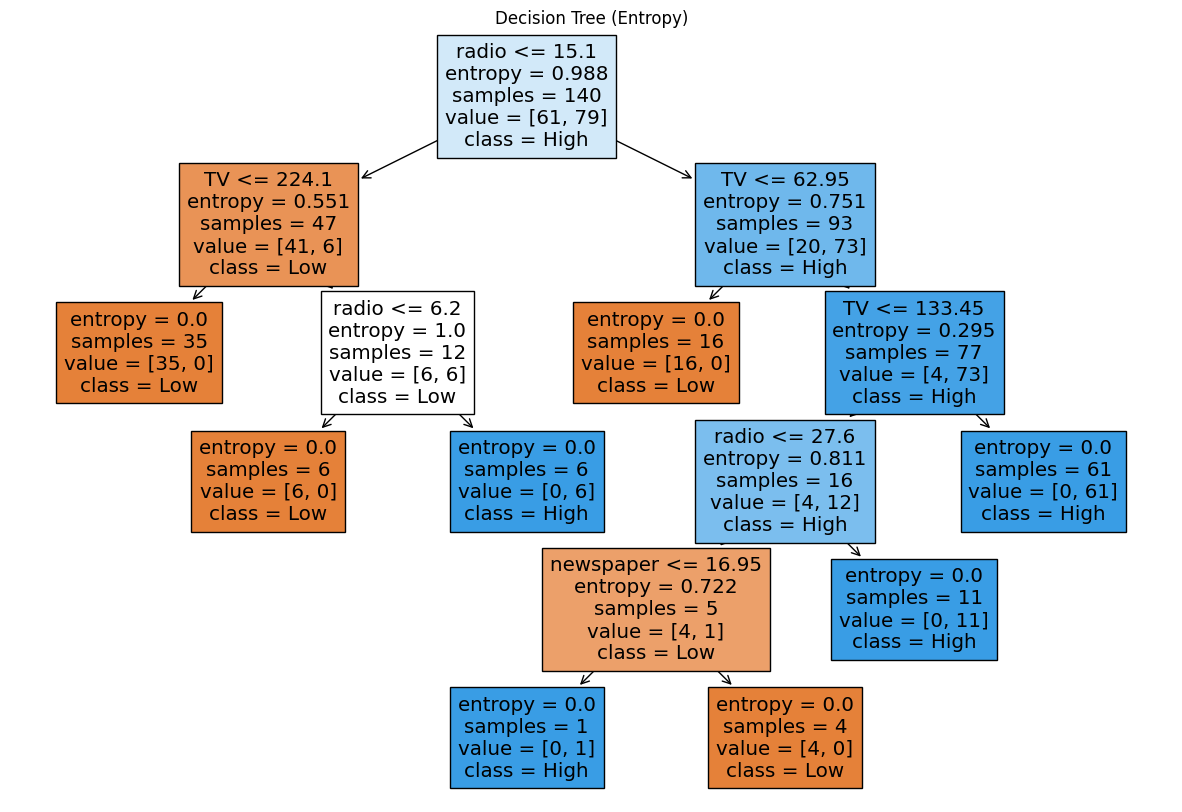

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Advertising Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Create a binary target variable (High Sales vs Low Sales)
median_sales = data['sales'].median()
data['sales_label'] = (data['sales'] > median_sales).astype(int)

# Define features and target
X = data[['TV', 'radio', 'newspaper']]
y = data['sales_label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score

# Initialize the DecisionTreeClassifier with Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Gini Index): {accuracy_gini:.2f}")

# Plot the resulting decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Low', 'High'])
plt.title("Decision Tree (Gini Index)")
plt.show()

# Initialize the DecisionTreeClassifier with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

# Plot the resulting decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Low', 'High'])
plt.title("Decision Tree (Entropy)")
plt.show()

# 2. Creating a Decision Tree Without sklearn

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter

# Function to calculate entropy
def calculate_entropy(y):
    class_counts = Counter(y)
    total_samples = len(y)
    entropy = 0.0

    for cls in class_counts:
        p = class_counts[cls] / total_samples
        entropy -= p * math.log2(p)

    return entropy

# Function to calculate information gain
def calculate_information_gain(X, y, feature):
    base_entropy = calculate_entropy(y)
    values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy = 0.0
    for i, value in enumerate(values):
        subset_y = y[X[feature] == value]
        subset_entropy = calculate_entropy(subset_y)
        weighted_entropy += (counts[i] / sum(counts)) * subset_entropy
    information_gain = base_entropy - weighted_entropy
    return information_gain

# Load the Advertising Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Create a binary target variable
median_sales = data['sales'].median()
data['sales_label'] = (data['sales'] > median_sales).astype(int)

# Define a small subset of the data
subset = data[['TV', 'radio', 'newspaper', 'sales_label']].head(10)
X = subset[['TV', 'radio', 'newspaper']]
y = subset['sales_label']

# Calculate information gain for each feature
info_gain_tv = calculate_information_gain(X, y, 'TV')
info_gain_radio = calculate_information_gain(X, y, 'radio')
info_gain_newspaper = calculate_information_gain(X, y, 'newspaper')

print(f"Information Gain for TV: {info_gain_tv}")
print(f"Information Gain for Radio: {info_gain_radio}")
print(f"Information Gain for Newspaper: {info_gain_newspaper}")

# Determine the root node
if info_gain_tv > info_gain_radio and info_gain_tv > info_gain_newspaper:
    root_node = 'TV'
elif info_gain_radio > info_gain_tv and info_gain_radio > info_gain_newspaper:
    root_node = 'Radio'
else:
    root_node = 'Newspaper'

print(f"The root node will be based on: {root_node}")

Information Gain for TV: 0.8812908992306927
Information Gain for Radio: 0.8812908992306927
Information Gain for Newspaper: 0.8812908992306927
The root node will be based on: Newspaper


# 3. Decision Trees for Classification and Regression

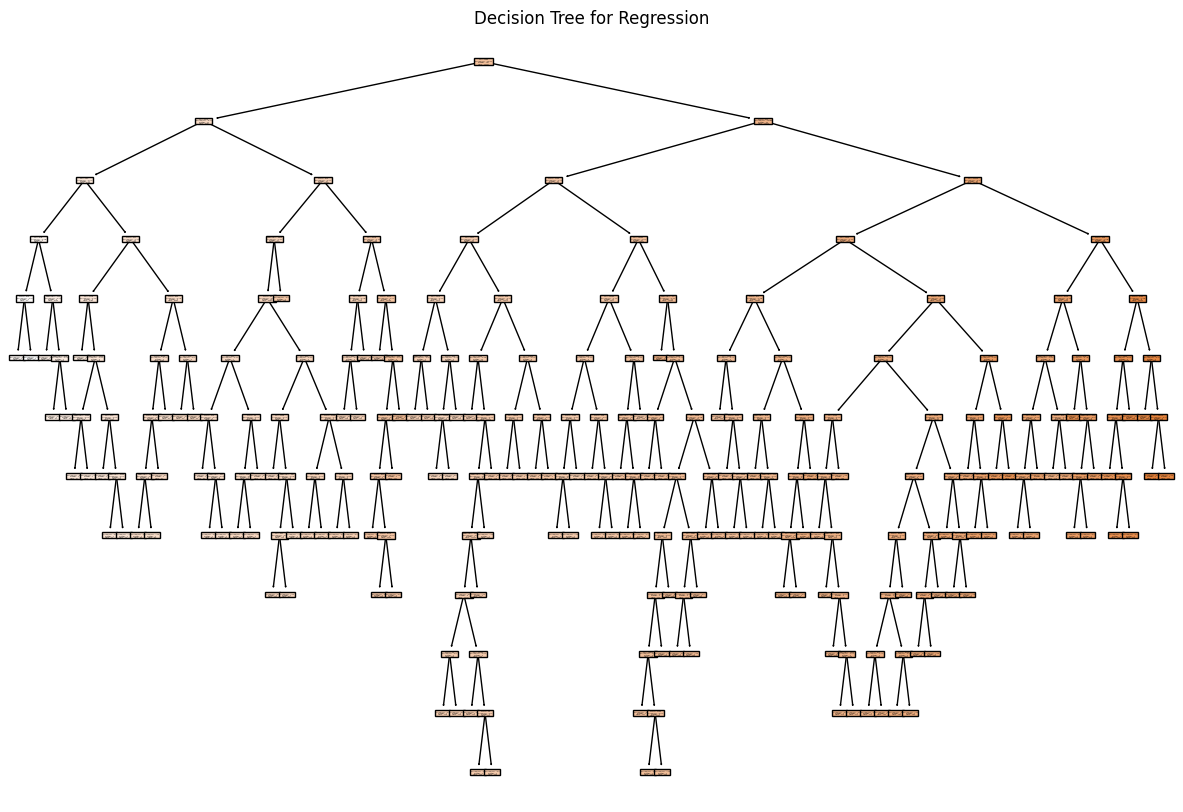

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define features and target
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Plot the resulting decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree for Regression")
plt.show()
